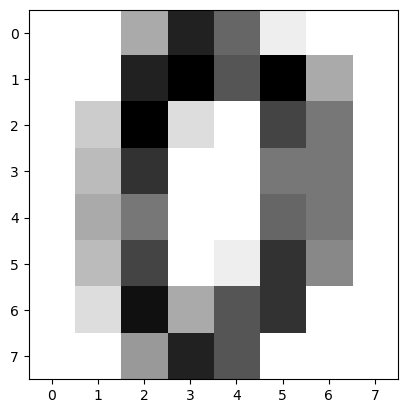

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap = plt.cm.gray_r, interpolation = 'nearest')

In [3]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size = 0.2)

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

models = {
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=200),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors = 6),
    'Support Vector Machine': SVC()
}

In [12]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores = metrics.accuracy_score(y_test, y_pred)
    print(f"\n{model_name} accuracy : {scores}")


Random Forest accuracy : 0.9722222222222222

Decision Tree accuracy : 0.8555555555555555

Logistic Regression accuracy : 0.9638888888888889

K-Nearest Neighbors accuracy : 0.9805555555555555

Support Vector Machine accuracy : 0.9888888888888889


In [17]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns

#원-핫 엔코딩, X = data, Y = digits.target
Y = pd.get_dummies(digits.target).values
X = data
# data가 array 속성이기 때문에 바로 사용해줌.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [18]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

model = Sequential()

# 신경망 생성 --> 뉴런 갯수, active 방식.
model.add(Dense(10, input_shape = (64,), activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(10, activation = 'sigmoid'))

model.compile(Adam(learning_rate = 0.01), 'binary_crossentropy', metrics = ['accuracy'])

model.summary()

C:\Users\CHOI.DESKTOP-R51MDOU\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │             165 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 20)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 20)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             210 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,765 (6.89 KB)

 Trainable params: 1,765 (6.89 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
#예측 시작
model_history = model.fit(x = X_train, y = y_train, epochs = 30, batch_size = 23, validation_data = (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2904 - loss: 0.3894 - val_accuracy: 0.6917 - val_loss: 0.1514
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7437 - loss: 0.1316 - val_accuracy: 0.8222 - val_loss: 0.0909
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8014 - loss: 0.0888 - val_accuracy: 0.8500 - val_loss: 0.0781
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8815 - loss: 0.0709 - val_accuracy: 0.8972 - val_loss: 0.0613
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8775 - loss: 0.0653 - val_accuracy: 0.8917 - val_loss: 0.0580
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9122 - loss: 0.0503 - val_accuracy: 0.8500 - val_loss: 0.0826
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8911 - loss: 0.0591 - val_accuracy: 0.9056 - val_loss: 0.0572
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9358 - loss: 0.0373 - val_accuracy: 0.9333 - val_loss:

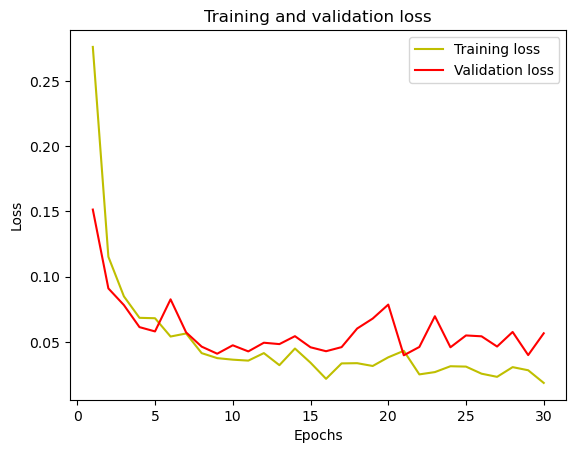

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

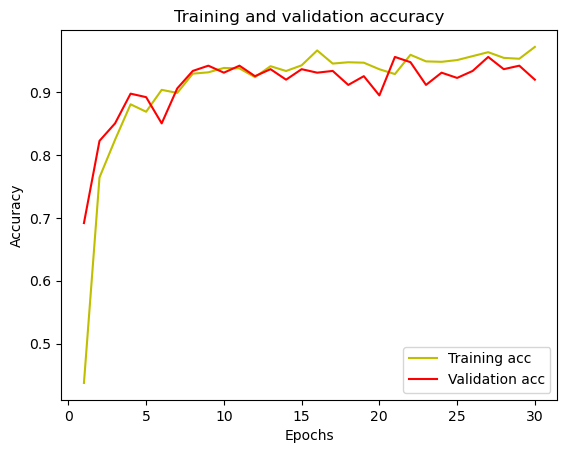

In [21]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()